# Lead Scoring CaseStudy

## Problem Statement: 
 
###### An education company named X Education sells online courses to industry professionals. Many professionals who are interested in the courses land on their website and browse for courses, When company markets its course on several websites and search engines like Google, once people lands on websites, they might browse the course or fill up a form for the course or watch some videos. By collecting the information the sales team starts converting the people into leads, typically conversion rate is around 30%. 

### Goal of the company: Target lead conversion rate to be around 80%.


In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib.pyplot import xticks

# Importing data, Understanding data

In [3]:
# Imports dataset into dataframe

Leads = pd.read_csv(r"Leads.csv")
Leads.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### let's look at the dimensions of the dataframe

In [ ]:
# check the shape of a dataframe
Leads.shape

In [13]:
# check the column information of a dataframe
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
Prospect ID                                 9240 non-null object
Lead Number                                 9240 non-null int64
Lead_Origin                                 9240 non-null object
Lead_Source                                 9204 non-null object
Do Not Email                                9240 non-null object
Do Not Call                                 9240 non-null object
Converted                                   9240 non-null int64
TotalVisits                                 9103 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9103 non-null float64
Last_Activity                               9137 non-null object
Country                                     6779 non-null object
Specialization                              5860 non-null object
current_occupation                          6550 

**check for NA values in dataset**

In [ ]:
print(Leads.isnull().sum())

In [ ]:
print(Leads.isnull().values.any())

In [ ]:
print(Leads.isnull().values.sum())

In [ ]:
Leads.describe()

### Handle 'select'

In [4]:
Leads = Leads.replace('Select', np.nan)

#### checking the % of Null's columnwise

In [ ]:
    round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

## Data Cleansing

In [5]:
# Drop the columns above 70% null

Leads = Leads.drop(Leads.loc[:,list(round(100*(Leads.isnull().sum()/len(Leads.index)), 2)>70)].columns, 1)

In [ ]:
Leads.shape

In [ ]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Still we need to check high% Null's columns i.e above >30%

In [6]:
# Rename column name for more convenience 

Leads = Leads.rename(columns={'Lead Origin':'Lead_Origin','Lead Source':'Lead_Source','Last Activity':'Last_Activity',
                              'X_Education_Forums':'X_Education_Forums',
                              'DigitalAdvertisement' : 'Digital_Advertisement',
                              'How did you hear about X Education':'How_did_you_hear_about_X_Education',
                              'What is your current occupation':'current_occupation',
                              'What matters most to you in choosing a course':'What_matter_choosing_course',
                              'Lead Quality':'Lead_Quality','Lead Profile':'Lead_Profile',
                              'Last Notable Activity' :'Last_Notable_Activity',
                              'Lead Quality':'Lead_Quality',
                              'Asymmetrique Activity Index': 'Asymmetrique_Activity_Index',
                              'Asymmetrique Profile Index' : 'Asymmetrique_Profile_Index',
                              'Asymmetrique Activity Score': 'Asymmetrique_Activity_Score',
                              'Asymmetrique Profile Score' : 'Asymmetrique_Profile_Score'
                                 })

#### Lead_Quality has 51.59% Null's

In [ ]:
sns.countplot(Leads.Lead_Quality)
xticks(rotation = 90)

In [9]:
Leads.Lead_Quality.value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead_Quality, dtype: int64

In [10]:
Leads['Lead_Quality'].describe()


count         9240
unique           5
top       Not Sure
freq          5859
Name: Lead_Quality, dtype: object

#### Here we can see 4473 values are exists out of 9240, so many 'nan's are exists, here we can impute 'Not Sure' for nan, because keeping an empty value may give the meaning of 'Not Sure' 

In [17]:
Leads['Lead_Quality'] = Leads['Lead_Quality'].replace(np.nan, 'Not Sure')

In [ ]:
Leads['Lead_Quality'].describe()

#### We will see next high% Null columns i.e  'Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score'

Above columns are index and score assigned to each customer based on their activity and their profile

For more convinient we plot the count plots for all these columns

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(Leads['Asymmetrique_Activity_Index'], ax = axs[0,0])
plt2 = sns.boxplot(Leads['Asymmetrique_Activity_Score'], ax = axs[0,1])
plt3 = sns.countplot(Leads['Asymmetrique_Profile_Index'], ax = axs[1,0])
plt4 = sns.boxplot(Leads['Asymmetrique_Profile_Score'], ax = axs[1,1])
plt.tight_layout()

#### There is too much variation in these metrics, it may not be safe to impute the value in it, any way for these columns we have 45.65% null's, we can drop these columns

In [18]:
Leads = Leads.drop(['Asymmetrique_Activity_Index','Asymmetrique_Activity_Score','Asymmetrique_Profile_Index',
                    'Asymmetrique_Profile_Score'],1)

In [ ]:
Leads.shape

In [ ]:
round(Leads.isnull().sum()/len(Leads.index)*100,2)

City metric

In [ ]:
sns.countplot(Leads.City)
xticks(rotation=45)
plt.show()

In [ ]:
Leads['City'].describe()

In [ ]:
Leads.City.value_counts()

Mumbai holding high count in the dataset, so we can impute 'Mumbai' in blanks

In [19]:
Leads['City'] = Leads['City'].replace(np.nan,'Mumbai')

We will check with 'Tags' column

In [ ]:
Leads['Tags'].describe()

In [ ]:
Leads.Tags.value_counts()

In Tags column we can impute 'Will revert after reading the email' in blanks

In [20]:
Leads['Tags']=Leads['Tags'].replace(np.nan,'Will revert after reading the email')

#### we will check with Specilization column

In [ ]:
Leads['Specialization'].describe()

In [ ]:
Leads.Specialization.value_counts()

#### Here It maybe the case that lead has not entered any specialization if he/she should not reveal it or his/her option is not availabe in the list, or may not have any specialization or is a student or even a unemployee

#### Hence we replace "Others" for missing values. 

In [21]:
Leads['Specialization'] = Leads['Specialization'].replace(np.nan, 'Others')

What_matter_choosing_course mertic

In [ ]:
Leads['What_matter_choosing_course'].describe()

In [ ]:
Leads.What_matter_choosing_course.value_counts()

In 'What_matter_choosing_course' column we can impute 'Better Career Prospects' in blanks

In [22]:
Leads['What_matter_choosing_course'] = Leads['What_matter_choosing_course'].replace(np.nan, 'Better Career Prospects')

In [ ]:
Leads.What_matter_choosing_course.value_counts()

#### curret_occupation metric

In [ ]:
Leads['current_occupation'].describe()

In [ ]:
Leads.current_occupation.value_counts()

#### 86% entries are of Unemployed so we can impute "Unemployed" in 'current occupation' mertic

In [23]:
Leads['current_occupation'] = Leads['current_occupation'].replace(np.nan, 'Unemployed')

#### country metric

In [ ]:
Leads.Country.value_counts()

#### Country is India for most values so let's impute the same in missing values.


In [24]:
Leads['Country'] =Leads['Country'].replace(np.nan, 'India')

In [ ]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

### Here we can notice that missing values are below 2%, we can drop those rows safely

In [25]:
Leads.dropna(inplace = True)

In [ ]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

#### Now we drill down other things in dataset i.e we will check non-null columns, whether data looks good or not

In [ ]:
sum(Leads.duplicated(subset = "Prospect ID")) == 0

In [ ]:
Leads['Lead_Origin'].unique()

In [ ]:
Leads.Lead_Origin.value_counts()

In [ ]:
Leads['Lead_Source'].unique()

In [26]:
Leads['Lead_Source'] = Leads['Lead_Source'].replace('google','Google')
Leads['Lead_Source'] = Leads['Lead_Source'].replace(['blog','WeLearn'], 'welearnblog_Home')


In [ ]:
Leads['Lead_Source'].unique()

In [ ]:
Leads.Lead_Source.value_counts()

Here many values in this column holding less than count of 10, so we make group for those

In [27]:
Leads['Lead_Source'] = Leads['Lead_Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads',
                                                     'Press_Release','Social Media', 'bing', 'testone', 
                                                     'welearnblog_Home', 'youtubechannel'], 'Others')

In [ ]:
Leads.Lead_Source.value_counts()

In [ ]:
Leads['Last_Activity'].unique()

In [ ]:
Leads.Last_Activity.value_counts()

In [28]:
Leads['Last_Activity'] = Leads['Last_Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

In [ ]:
Leads['Do Not Email'].unique()

In [ ]:
Leads['Do Not Call'].unique()

In [ ]:
Leads['Search'].unique()

In [ ]:
Leads['Magazine'].unique()

In [ ]:
Leads['Newspaper Article'].unique()

In [ ]:
Leads['X Education Forums'].unique()

In [ ]:
Leads['Newspaper'].unique()

In [ ]:
Leads['Digital Advertisement'].unique()

In [ ]:
Leads['Through Recommendations'].unique()

In [ ]:
Leads['Receive More Updates About Our Courses'].unique()

In [ ]:
Leads['Update me on Supply Chain Content'].unique()

In [ ]:
Leads['Get updates on DM Content'].unique()

In [ ]:
Leads['I agree to pay the amount through cheque'].unique()

In [ ]:
Leads['A free copy of Mastering The Interview'].unique()

In [ ]:
Leads['Last_Notable_Activity'].unique()

In [ ]:
Leads.Last_Notable_Activity.value_counts()

In [ ]:
Leads.describe()

#### Data cleansing has been completed as much as possible

## Exploratory Data Analytics

## Univariate Analysis

We will check with our target column 'Converted'

In [ ]:
# Check % lead converts froom our dataset

Converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
Converted

% of lead conversion 37.8 




#### Lead Origin Metric

In [29]:
round(Leads.groupby('Lead_Origin')['Converted'].mean()*100,2)

Lead_Origin
API                        31.16
Landing Page Submission    36.17
Lead Add Form              93.63
Lead Import                30.00
Name: Converted, dtype: float64

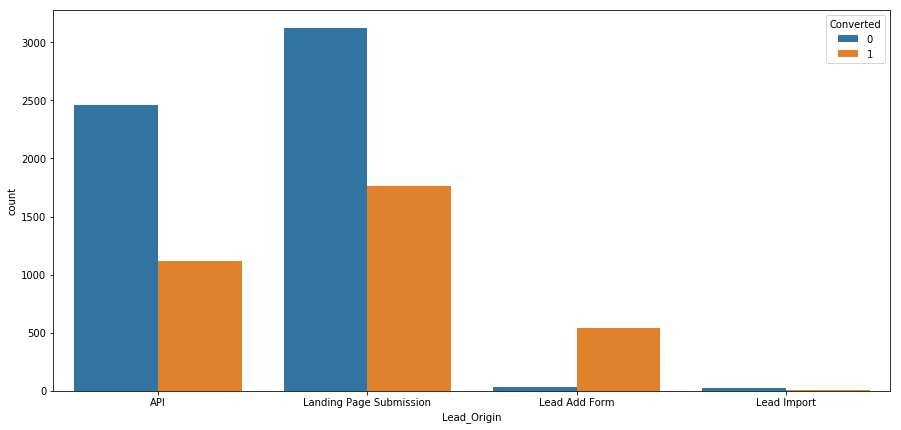

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(x = "Lead_Origin", hue = "Converted", data = Leads)
plt.show()

Here 1 implies 'Lead converted' and 0 implies 'Lead not converted'

Inference
1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3. Lead Import are very less in count.


We may improve lead coversion rate by focusing more on API and Landing page submission origin

### Lead Source Metric

In [31]:
round(Leads.groupby('Lead_Source')['Converted'].mean()*100,2)

Lead_Source
Direct Traffic      32.17
Facebook            29.03
Google              39.92
Olark Chat          25.56
Organic Search      37.78
Others              39.13
Reference           92.55
Referral Sites      24.80
Welingak Website    98.45
Name: Converted, dtype: float64

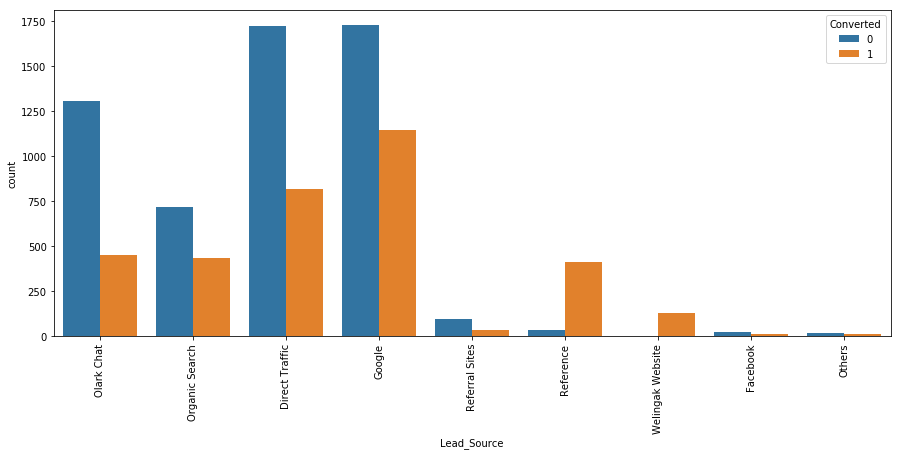

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Lead_Source", hue = "Converted", data = Leads)
xticks(rotation = 90)
plt.show()

Inference
1. Google, Direct traffic and olark chat generates maximum number of leads and from their conversion rate ranging between 30-65% and overall approching counts also looks good.
2. Conversion Rate of reference leads and leads through welingak website is high where approching counts looks very less

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.



 

#### Do Not Email & Do Not Cal metric's

In [32]:
round(Leads.groupby('Do Not Email')['Converted'].mean()*100,2)

Do Not Email
No     39.85
Yes    14.53
Name: Converted, dtype: float64

In [33]:
round(Leads.groupby('Do Not Call')['Converted'].mean()*100,2)

Do Not Call
No      37.84
Yes    100.00
Name: Converted, dtype: float64

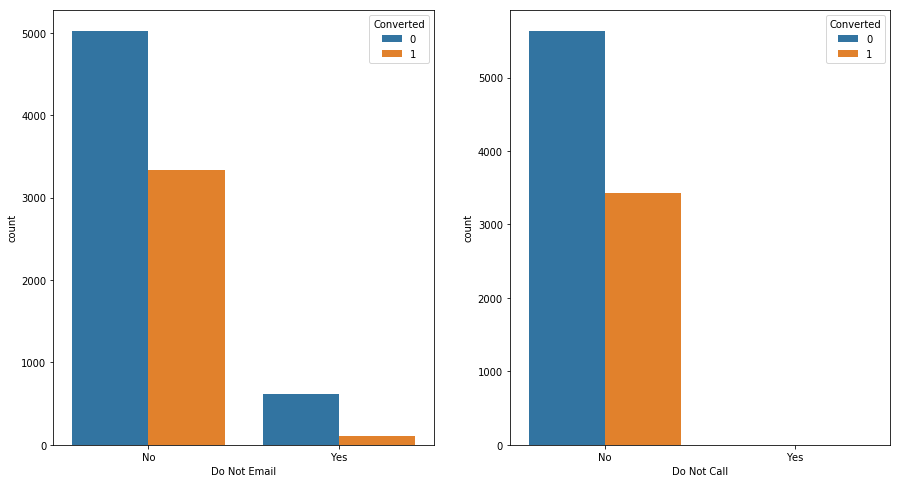

In [34]:
fig, axs = plt.subplots(1,2,figsize = (15,8))
sns.countplot(x = "Do Not Email", hue = "Converted", data = Leads, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = Leads, ax = axs[1])
plt.show()

% of Leads conversion looks good, if focus more conversion rate would improve more 

#### Total visists metric

In [ ]:
Leads['TotalVisits'].describe()

In [ ]:
Leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

In [ ]:
sns.boxplot(Leads['TotalVisits'])

Outliers are there in the dataset, we can apply outlier treatment and take 95% of values for analysis

In [ ]:
percentiles = Leads['TotalVisits'].quantile([0.05,0.95]).values
Leads['TotalVisits'][Leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
Leads['TotalVisits'][Leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

In [ ]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Leads)
plt.show()

Inference
Median for converted and not converted leads are the same.

Conclusion would be nothing with this metric

### Total time spent on website metric

In [36]:
Leads['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

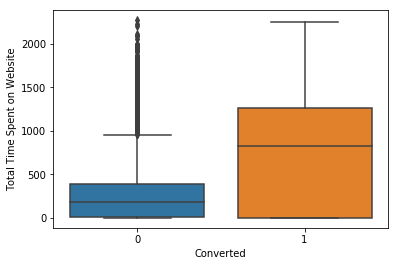

In [37]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Leads)
plt.show()

Inference
Leads spending more time on the weblise are more likely to be converted.

To improve conversion still more, Website should be made more engage, efficient to make leads spend more time.

#### Page views per visit metric

In [38]:
Leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

It seems we have apply outlier treatment for this metric

In [39]:
percentiles = Leads['Page Views Per Visit'].quantile([0.05,0.95]).values
Leads['Page Views Per Visit'][Leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
Leads['Page Views Per Visit'][Leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

In [ ]:
sns.boxplot(Leads['Page Views Per Visit'])
plt.show()

In [ ]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = Leads)
plt.show()

Inference

1. Median for converted and unconverted leads are same.

Nothing can be said specifically for lead conversion from Page Views Per Visit

## Last Activity

In [41]:
round(Leads.groupby('Last_Activity')['Converted'].mean()*100,2)

Last_Activity
Converted to Lead            12.62
Email Bounced                 5.13
Email Link Clicked           27.34
Email Opened                 36.42
Form Submitted on Website    24.14
Olark Chat Conversation       8.64
Other_Activity               73.81
Page Visited on Website      23.59
SMS Sent                     62.78
Unreachable                  32.22
Unsubscribed                 23.73
Name: Converted, dtype: float64

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x = "Last_Activity", hue = "Converted", data = Leads)
xticks(rotation = 90)
plt.show()

Inference

1. Most of the lead have their Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is almost 60%.
3. next falls page visited on webiste also modertely considerable

### Country

In [42]:
round(Leads.groupby('Country')['Converted'].mean()*100,2)

Country
Asia/Pacific Region      50.00
Australia                23.08
Bahrain                  57.14
Bangladesh               50.00
Belgium                   0.00
Canada                    0.00
China                     0.00
Denmark                 100.00
France                   50.00
Germany                  25.00
Ghana                     0.00
Hong Kong                57.14
India                    38.14
Indonesia                 0.00
Italy                     0.00
Kenya                     0.00
Kuwait                    0.00
Liberia                   0.00
Malaysia                  0.00
Netherlands              50.00
Nigeria                   0.00
Oman                     50.00
Philippines               0.00
Qatar                    10.00
Russia                    0.00
Saudi Arabia             19.05
Singapore                45.83
South Africa             25.00
Sri Lanka                 0.00
Sweden                   33.33
Switzerland               0.00
Tanzania                  0.00


In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x = "Country", hue = "Converted", data = Leads)
xticks(rotation = 90)
plt.show()

Inference

Most Leads are from 'India' and no such inference can be drawn

### Specialization

In [45]:
round(Leads.groupby('Specialization')['Converted'].mean()*100,2)

Specialization
Banking, Investment And Insurance    48.96
Business Administration              43.86
E-Business                           36.84
E-COMMERCE                           35.14
Finance Management                   44.00
Healthcare Management                48.72
Hospitality Management               40.54
Human Resource Management            45.40
IT Projects Management               38.25
International Business               35.23
Marketing Management                 48.24
Media and Advertising                41.58
Operations Management                46.89
Others                               27.45
Retail Management                    34.00
Rural and Agribusiness               42.47
Services Excellence                  27.50
Supply Chain Management              42.77
Travel and Tourism                   35.15
Name: Converted, dtype: float64

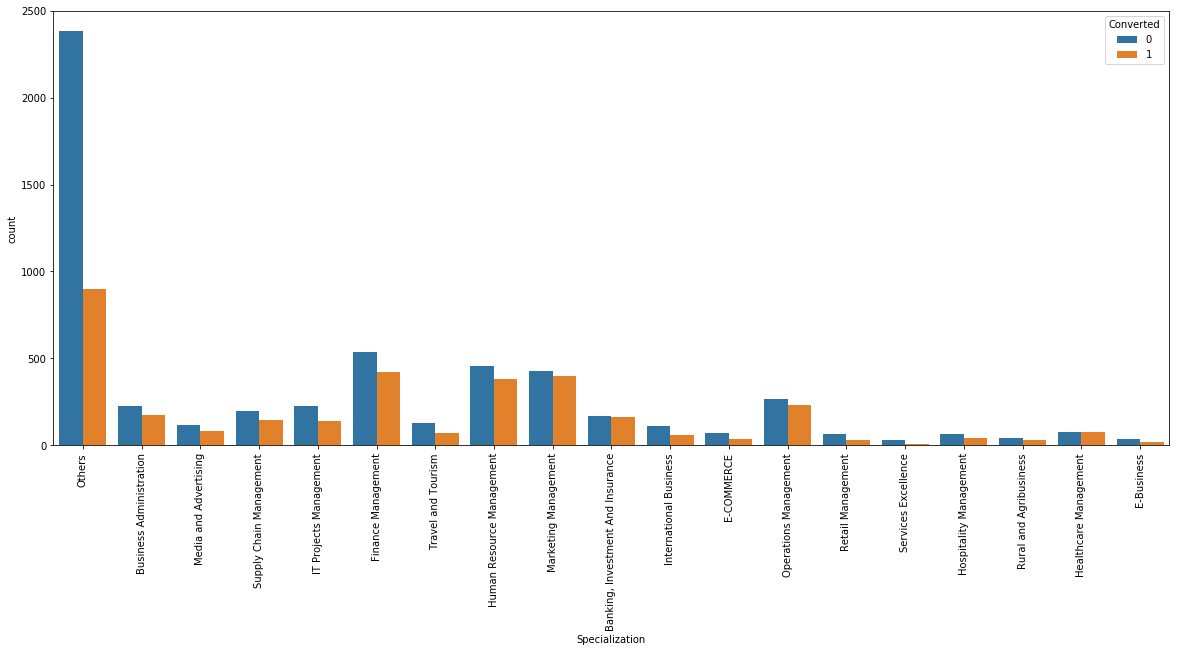

In [44]:
plt.figure(figsize=(20,8))
sns.countplot(x = "Specialization", hue = "Converted", data = Leads)
xticks(rotation=90)
plt.show()

Inference

1. Leads are generating very good count on 'others' as their specilization
2. conversion rate are very high in 'HRM', 'Marketing Management','Operations Management' and 'Finance Management'

Focus on more high other specilization would be good because it is generating more number of approching count


### Occupation

In [46]:
round(Leads.groupby('current_occupation')['Converted'].mean()*100,2)

current_occupation
Businessman              62.50
Housewife               100.00
Other                    60.00
Student                  35.92
Unemployed               33.29
Working Professional     91.88
Name: Converted, dtype: float64

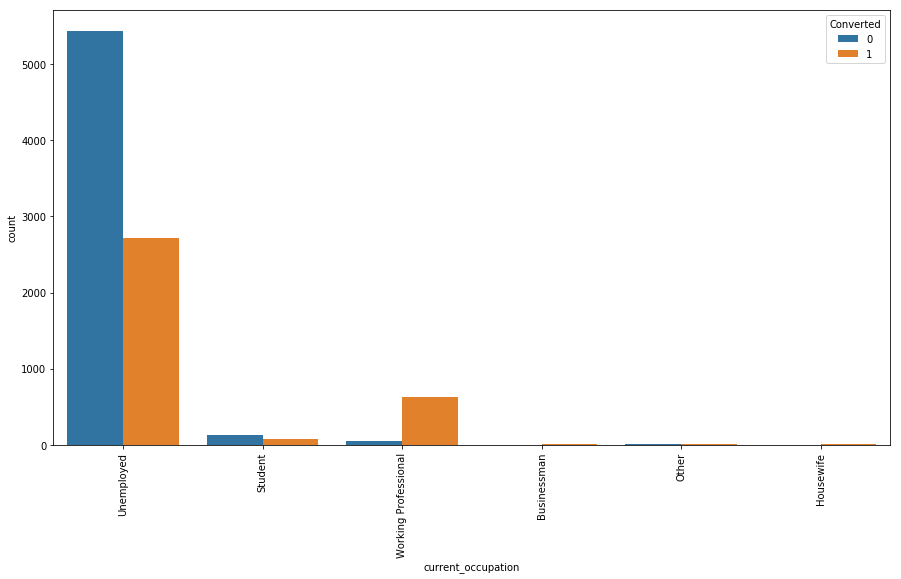

In [47]:
plt.figure(figsize=(15,8))
sns.countplot(x = "current_occupation", hue = "Converted", data = Leads)
xticks(rotation = 90)
plt.show()

Inference
1. Working Professionals going for the course have high chances of joining it.
2. Unemployed leads are the high in numbers but has around 30-35% conversion rate.

Focus on unemployed to get more conversion rate/


#### What matters most to you in choosing a course

In [48]:
round(Leads.groupby('What_matter_choosing_course')['Converted'].mean()*100,2)

What_matter_choosing_course
Better Career Prospects       37.85
Flexibility & Convenience    100.00
Other                          0.00
Name: Converted, dtype: float64

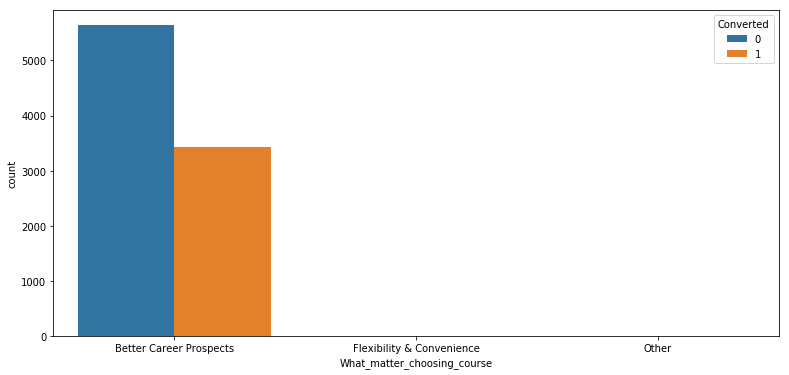

In [49]:
plt.figure(figsize=(13,6))
sns.countplot(x = "What_matter_choosing_course", hue = "Converted", data = Leads)
plt.show()

Inference

Most leads are 'Better Career Prospects'. No Inference can be drawn with this parameter.

### Search, Magazine, NewsPaper Article, X Education Forums, NewsPaper, Digital Advertisement, Throug Recommendations, Receive more updates about our courses Metric's

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(3,3,1)
sns.countplot(x = "Search", hue = "Converted", data = Leads)
#plt.title("Search Metric")

plt.subplot(3,3,2)
sns.countplot(x = "Magazine", hue = "Converted", data = Leads)
#plt.title("Magazine Metric")

plt.subplot(3,3,3)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = Leads)
#plt.title("Newspaper Article Metric")

plt.subplot(3,3,4)
sns.countplot(x = "X Education Forums", hue = "Converted", data = Leads)
#plt.title("X_Education_Forums Article Metric")

plt.subplot(3,3,5)
sns.countplot(x = "Newspaper", hue = "Converted", data = Leads)
#plt.title("Newspaper")

plt.subplot(3,3,6)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = Leads)
#plt.title("Digital Advertisement")

plt.subplot(3,3,7)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = Leads)
#plt.title("Through Recommendations")

plt.subplot(3,3,8)
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = Leads)
#plt.title("Receive More Updates About Our Courses")

plt.tight_layout()
plt.show()


Inference
1. Most entries are 'No' in search metric and No Inference can be drawn with this parameter.
2. Most entries are 'No' in Magazine metric no Inference can be drawn with this parameter.
3. Most entries are 'No' in Newspaper Article metric and no Inference can be drawn with this parameter.
4. Most entries are 'No' in x-education forums and no Inference can be drawn with this parameter.
5. Most entries are 'No' in Newspapers metric and no Inference can be drawn with this parameter.
6. Most entries are 'No' in Digital advertisement metric and no Inference can be drawn with this parameter.
7. Most entries are 'No' in through recommendations and no Inference can be drawn with this parameter.
8. Most entries are 'No' in Receive More Updates About Our Courses metric and no Inference can be drawn with this parameter

### Tags

In [50]:
round(Leads.groupby('Tags')['Converted'].mean()*100,2)

Tags
Already a student                                      0.65
Busy                                                  56.76
Closed by Horizzon                                    99.34
Diploma holder (Not Eligible)                          1.59
Graduation in progress                                 6.31
In confusion whether part time or DLP                 20.00
Interested  in full time MBA                           2.59
Interested in Next batch                             100.00
Interested in other courses                            2.55
Lateral student                                      100.00
Lost to EINS                                          97.67
Lost to Others                                         0.00
Not doing further education                            0.69
Recognition issue (DEC approval)                       0.00
Ringing                                                2.86
Shall take in the next coming month                   50.00
Still Thinking                     

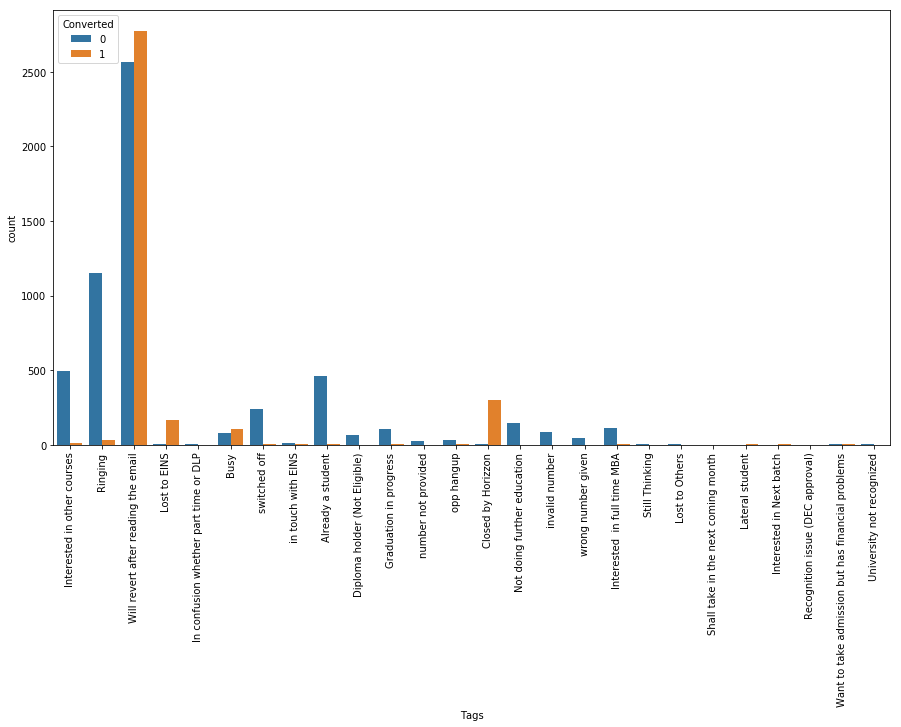

In [51]:
plt.figure(figsize=(15,8))
sns.countplot(x = "Tags", hue = "Converted", data = Leads)
xticks(rotation = 90)
plt.show()

In [ ]:
Leads.Tags.value_counts()

Inference

1. Many leads are telling that 'Will revert after reading the emai' and phone ringing status also

If we focus on both the values and provide alternate (i.e email may inbox as spam mail it lead couldn't read it all, and also by taking alternate phone number may resolve the problem), leads would converts successfully

#### Lead_Quality

In [52]:
round(Leads.groupby('Lead_Quality')['Converted'].mean()*100,2)

Lead_Quality
High in Relevance    94.26
Low in Relevance     81.83
Might be             75.71
Not Sure             21.70
Worst                 2.00
Name: Converted, dtype: float64

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = "Lead_Quality", hue = "Converted", data = Leads)
plt.show()

Inference

1. Leads are mostly in not sure status
2. Lead conversion rate are very high for status 'Might be', 'High in relevance', 'low in relevance'

Focus on 'not sure' status leads to turn up

### Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque, A free copy of Mastering The Interview Metrics

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = Leads)

plt.subplot(2,2,2)
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = Leads)

plt.subplot(2,2,3)
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = Leads)

plt.subplot(2,2,4)
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = Leads)

plt.tight_layout()
plt.show()


Inference

For all the abover metrics most of lead respones are 'NO' and inference can be taken from these parameters

#### City metric

In [53]:
round(Leads.groupby('City')['Converted'].mean()*100,2)

City
Mumbai                         36.37
Other Cities                   40.00
Other Cities of Maharashtra    43.95
Other Metro Cities             40.85
Thane & Outskirts              44.56
Tier II Cities                 33.78
Name: Converted, dtype: float64

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = "City", hue = "Converted", data = Leads)
plt.show()

Inference

Most leads are from mumbai with around 30% conversion rate.

#### Last Notable Activity

In [54]:
round(Leads.groupby('Last_Notable_Activity')['Converted'].mean()*100,2)

Last_Notable_Activity
Approached upfront              100.00
Email Bounced                    15.00
Email Link Clicked               26.01
Email Marked Spam               100.00
Email Opened                     36.91
Email Received                  100.00
Form Submitted on Website         0.00
Had a Phone Conversation         92.86
Modified                         20.81
Olark Chat Conversation          13.66
Page Visited on Website          29.25
Resubscribed to emails          100.00
SMS Sent                         69.19
Unreachable                      68.75
Unsubscribed                     26.67
View in browser link Clicked      0.00
Name: Converted, dtype: float64

In [ ]:
plt.figure(figsize=(13,7))
sns.countplot(x = "Last_Notable_Activity", hue = "Converted", data = Leads)
xticks(rotation=90)
plt.show()

Inference

Many leads are turning successfully in some of the values like 'SMS sent', 'Email opened', 'Modified'

Should focus more on 'Modified' and 'Email opened' activity leads

#### Univariate Analysis conclusions:
    
Based on the univariate analysis, we have seen that many columns are not adding any information to the model, hence we can drop them for frther analysis

In [ ]:
Leads = Leads.drop(['Lead Number','What_matter_choosing_course','Search','Magazine','Newspaper Article',
                    'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                    'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                    'Get updates on DM Content','I agree to pay the amount through cheque',
                    'A free copy of Mastering The Interview','Country'],1)

In [ ]:
Leads.shape

In [ ]:
Leads.info()

In [ ]:
Leads.describe()

## Data Preparation

In [ ]:
plt.figure(figsize = (20,10))      
sns.heatmap(Leads.corr(),annot = True)
plt.show()

#### Converting Binary variables

In [ ]:
# Converting Yes to 1 and No to 0

Leads['Do Not Email'] = Leads['Do Not Email'].map({'Yes': 1, 'No': 0})
Leads['Do Not Call'] = Leads['Do Not Call'].map({'Yes': 1, 'No': 0})

### Dummy Variable Creation

In [ ]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.

LO = pd.get_dummies(Leads['Lead_Origin'],prefix='Lead_Origin',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,LO],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.

LS = pd.get_dummies(Leads['Lead_Source'],prefix='Lead_Source',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,LS],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'Last_Activity' and dropping the first one.

LA = pd.get_dummies(Leads['Last_Activity'],prefix='Last_Activity',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,LA],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'Specialization' and dropping the first one.

SP = pd.get_dummies(Leads['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,SP],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'current_occupation' and dropping the first one.

CO = pd.get_dummies(Leads['current_occupation'],prefix='current_occupation',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,CO],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'Tags' and dropping the first one.

TAG = pd.get_dummies(Leads['Tags'],prefix='Tags',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,TAG],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'Lead Quality' and dropping the first one.

LQ = pd.get_dummies(Leads['Lead_Quality'],prefix='Lead_Quality',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,LQ],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'City' and dropping the first one.

CITY = pd.get_dummies(Leads['City'],prefix='City',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,CITY],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'Last_Notable_Activity' and dropping the first one.

LNA = pd.get_dummies(Leads['Last_Notable_Activity'],prefix='Last_Notable_Activity',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,LNA],axis=1)

### Dropping the repeated variables

In [ ]:
Leads = Leads.drop(["Lead_Origin", "Lead_Source", "Last_Activity", "Specialization","current_occupation","Tags", "Lead_Quality", "City", "Last_Notable_Activity"], axis=1)

In [ ]:
Leads.shape

In [ ]:
Leads.info()

In [ ]:
Leads.head()

In [ ]:
Leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

In [ ]:
# Check % lead converts froom our dataset

Converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
Converted

We have 37.8 Leads conversion rate

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = Leads.drop(['Prospect ID','Converted'], axis=1)

# Putting response variable to y
y = Leads['Converted']

### Splitting Data into Training and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
Leads.corr()

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

### Running Your First Training Model

In [ ]:
import statsmodels.api as sm

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

### Correlation Matrix

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,10))      
sns.heatmap(Leads.corr(),annot = True)
plt.show()

Its a bit tough to choose like thise, its better to go RFE

### Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# running RFE with 15 variables as output

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [ ]:
# check rfe support in boolean format
rfe.support_

In [ ]:
## check rfe support columns with its rank

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
# check selected 15 columns from train set by rfe

col = X_train.columns[rfe.support_]
col

In [ ]:
# Glance of rfe not supporting columns
X_train.columns[~rfe.support_]

In [ ]:
#Comparing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

Here 'Tags_invalid number' and 'Tags_number not provided' has high p values, we re-build the model by dropping those columns one after one

In [ ]:
col1 = col.drop('Tags_invalid number',1)

In [ ]:
col1

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
col2 = col1.drop('Tags_number not provided',1)

In [ ]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

### Model Evaluation

In [ ]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

In [ ]:
### Predicted     not_churn    churn
### Actual
### not_churn        3270      365
### churn            579       708  

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

We see an overall AUC score of 0.91 looks like we did a decent job.

### checking VIF's

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#### Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

### ROC Curve

An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.predicted)

In [ ]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

## Finding Optimal Cutoff Point

##### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

In [ ]:
# Assigning Lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

### Precision and Recall

In [ ]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

In [ ]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

In [ ]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

### Check with sklearn utilities

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

In [ ]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

#### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making prediction on test set

In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

In [ ]:
X_test = X_test[col2]
X_test.head()


In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
# making prediction
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

Model accuracy matches for both test and train sets

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))